<h2> Fig 1 analysis and code to make figures <h2> 

In [8]:

#Load in some useful things. If you dont have them get them with pip. 
import json 
import numpy as np
import pickle 
pickle.HIGHEST_PROTOCOL = 4
import pandas as pd
from scipy.stats import norm, gaussian_kde
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
import seaborn as sns
import dill #This will be used to store the workplace so you dont have to run certain cells
sns.set()
import os 
from os import walk
from math import nan
#import NPEETmaster.npeet.entropy_estimators as ee 

<h2> Median Calculation <h2> 

In [ ]:
#This is a simple code to calculate the median distances between all of the loci. It is straightforward (but some of the variables are named poorly)
#The results of this generates the data within the Single_Median folder. All of that data is also there. The script to make the heatmap is then in the next cell of this notebook

import time
from scipy.stats import entropy
from pathlib import Path
Npoints=1000

try:
    os.makedirs('Single_Median') 
except:
    print('Allready there')


(_, _, filenames) = next(os.walk('Linked_Trajectories'))
Cor=np.load('Linked_Trajectories/'+filenames[0])
num_of_loci=len(Cor)

Start=time.perf_counter()

#First step is going to be creating the dataframe with the proper size of empty lists

df2 = pd.DataFrame();
Array_Index=[]
for barcode1 in range(num_of_loci):
    Array_Index.append("barcode"+str(barcode1))
    Entropy_Array=np.zeros(num_of_loci)
    df2["barcode"+str(barcode1)]=Entropy_Array
df2["Inds"]=np.array(Array_Index)
df2.set_index('Inds',inplace=True)



for barcode1 in range(num_of_loci):

    print(barcode1/num_of_loci)
    clear_output(wait=True)

    file = "Distances/Distances_"+str(barcode1)
    df=pd.read_csv(file)

    for barcode2 in range(num_of_loci):
            if df2["barcode"+str(barcode1)]["barcode"+str(barcode2)]==0:
                if barcode2!=barcode1:

                    inds2=pd.notna(df["barcode"+str(barcode2)])

                    if len(df["barcode"+str(barcode2)][inds2])>Npoints:
                        
                        kiss=df["barcode"+str(barcode2)][inds2]

                        values=df["barcode"+str(barcode2)][inds2].values

                        Entropy=np.nanmedian(values)

                    else:
                        Entropy=nan

                    #kde_pdf, bb=np.histogram(df["barcode"+str(barcode2)], bins=x, range=None, normed=None, weights=None, density=True)
                    df2["barcode"+str(barcode1)]["barcode"+str(barcode2)]=Entropy
                    df2["barcode"+str(barcode2)]["barcode"+str(barcode1)]=Entropy

                


file = "Single_Median/Median"#+str(barcode1)
df2.to_csv(file,index=False)
print(time.perf_counter()-Start)


#except:

# print('There is a problem with '+Foldert)
#os.chdir('..')

<h2> Median Figure <h2> 

651
141.93660552370056


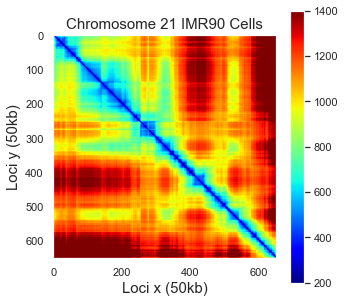

In [3]:

entstor=[]


num_of_loci=500
(_, _, filenames) = next(os.walk('Linked_Trajectories'))
Cor=np.load('Linked_Trajectories/'+filenames[0])
num_of_loci=len(Cor)



data_lin_dis = np.zeros((num_of_loci,num_of_loci))

for barcode1 in range(num_of_loci):
    #clear_output(wait=True)
    #print(barcode1/num_of_loci)
    try:
        for barcode2 in range(num_of_loci):
            if barcode2!=barcode1:

                Linear_Dist=np.abs(barcode1-barcode2)

                data_lin_dis[barcode1,barcode2]= Linear_Dist;
    except:
          print ("An error occurred")


file = "Single_Median/Median"#+str(barcode1)
df1=pd.read_csv(file)

#try:
   # CTCF_array=np.load('CTCF_array.npy')
#except:
   # print('no CTCF')


file = "Single_Median/Median"#+str(barcode1)
ff=pd.read_csv(file)

Entropy=ff.values
print(len(Entropy))


yax=np.zeros(num_of_loci);

for i in range(num_of_loci):
    yax[i]=i

fig=plt.figure()
cm = plt.cm.get_cmap('jet')

fig.set_size_inches(5,5)

vv1=plt.imshow((Entropy), cmap=cm)
print(np.min(Entropy[Entropy>0]))

plt.grid(b=None)
vv1.set_clim(200, 1400)
plt.colorbar(vv1)
plt.title('Chromosome 21 IMR90 Cells',fontsize=15)
plt.xlabel('Loci x (50kb)',fontsize=15)
plt.ylabel('Loci y (50kb)',fontsize=15)


plt.show()

fig.savefig("Figures/"+"Median.png", dpi=300, bbox_inches='tight')



<h2> Cumulative distributions given genomic distance <h2> 
    

In [ ]:
#This code generates the individual distributions for certain genomic distances. The genomic distance between loci are 50kb. 
#These results are already provided if you do not want to have to wait. Stored in Analyzed_Final

for kcat in [1,10,20,30,40,50,100]:

    variability=np.array([])
    for i in range(0,651):
        file="/Distances/Distances_"+str(i)
        try:

            df=pd.read_csv(file)
            variability=np.concatenate((variability,df['barcode'+str(i+kcat)]))

        except:
            hey=1


    print(np.nanmean(variability))

    import scipy.stats as st
    #plt.figure()
    x=variability[np.isnan(variability)==False]
    value_time=plt.hist(x, density=True, bins=range(0, 6000), cumulative=True)


    #Time to save our the pdf of the distribution
    save_array=value_time[0]
    file='Analyzed_Final/real_chrom_density'+str(kcat)
    np.save(file, save_array)


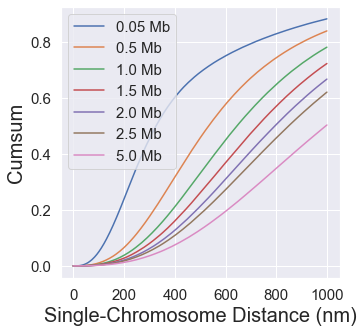

In [5]:
#This will generate the figure
fig=plt.figure()
for kcat in [1,10,20,30,40,50,100]:
    file='Analyzed_Final/real_chrom_density'+str(kcat)+'.npy'
    neigh=np.load(file)
    plt.plot((neigh[0:1000]),label=str(kcat*50/1000)+' Mb')
    
    
fig.set_size_inches(5,5)

plt.tick_params(labelsize=15)

plt.legend(fontsize=15)
plt.xlabel('Single-Chromosome Distance (nm)',fontsize=20)
plt.ylabel('Cumsum',fontsize=20)
fig.savefig("Figures/"+"Cumsum_Chrom_Density_Distribution.png", dpi=300, bbox_inches='tight')

<h2> Standard Deviations Surrounding Genes </h2> 

<h3> First we are going to quantify the STD around each gene and save it </h3> 

In [ ]:
#This is the code to quantify the STD for when the genes are on


import time
from scipy.stats import entropy
from pathlib import Path
Npoints=100

try:
    os.makedirs('Single_Gene_on_std') 
except:
    print('Allready there')


(_, _, filenames) = next(os.walk('../Linked_Trajectories'))
Cor=np.load('../Linked_Trajectories/'+filenames[0])
num_of_loci=len(Cor)

Start=time.perf_counter()

#First step is going to be creating the dataframe with the proper size of empty lists

df2 = pd.DataFrame();
Array_Index=[]
for barcode1 in range(num_of_loci):
    Array_Index.append("barcode"+str(barcode1))
    Entropy_Array=np.zeros(num_of_loci)
    df2["barcode"+str(barcode1)]=Entropy_Array
df2["Inds"]=np.array(Array_Index)
df2.set_index('Inds',inplace=True)

for barcode in range(num_of_loci):

    file='Transcription_Trajectories/Test'+str(barcode)+'.npy'
    trans=0
    try:
        trans=np.load(file)
    except:
        hey=1
        
    if np.nansum(trans)>0:
        
        
        #Grab inds for when the gene is on
        inds2=trans>0;
        
        
        df2 = pd.DataFrame();
        Array_Index=[]
        for barcode1 in range(num_of_loci):
            Array_Index.append("barcode"+str(barcode1))
            Entropy_Array=np.zeros(num_of_loci)
            df2["barcode"+str(barcode1)]=Entropy_Array
        df2["Inds"]=np.array(Array_Index)
        df2.set_index('Inds',inplace=True)

        
        for barcode1 in range(num_of_loci):

            print(barcode/num_of_loci, barcode1/num_of_loci)
            clear_output(wait=True)

            file = "Distances/Distances_"+str(barcode1)
            df=pd.read_csv(file)

            for barcode2 in range(num_of_loci):
                    if df2["barcode"+str(barcode1)]["barcode"+str(barcode2)]==0:
                        if barcode2!=barcode1:

                            

                            if len(df["barcode"+str(barcode2)][inds2])>Npoints:

                                values=df["barcode"+str(barcode2)][inds2].values
                                Entropy=np.nanstd(values)

                            else:
                                Entropy=nan

                            #kde_pdf, bb=np.histogram(df["barcode"+str(barcode2)], bins=x, range=None, normed=None, weights=None, density=True)
                            df2["barcode"+str(barcode1)]["barcode"+str(barcode2)]=Entropy
                            df2["barcode"+str(barcode2)]["barcode"+str(barcode1)]=Entropy
                            
        



        #Ignore the name within the folder
        file = "Single_Gene_on_std/Median_"+str(barcode)
        df2.to_csv(file,index=False)
        print(time.perf_counter()-Start)

In [ ]:
#This is the code to quantify the STD when the gene is off
import time
from scipy.stats import entropy
from pathlib import Path
Npoints=100

try:
    os.makedirs('Single_Gene_off_std') 
except:
    print('Allready there')


(_, _, filenames) = next(os.walk('Linked_Trajectories'))
Cor=np.load('Linked_Trajectories/'+filenames[0])
num_of_loci=len(Cor)


Start=time.perf_counter()

#First step is going to be creating the dataframe with the proper size of empty lists

df2 = pd.DataFrame();
Array_Index=[]
for barcode1 in range(num_of_loci):
    Array_Index.append("barcode"+str(barcode1))
    Entropy_Array=np.zeros(num_of_loci)
    df2["barcode"+str(barcode1)]=Entropy_Array
df2["Inds"]=np.array(Array_Index)
df2.set_index('Inds',inplace=True)

for barcode in range(num_of_loci):

    file='Transcription_Trajectories/Test'+str(barcode)+'.npy'
    trans=0
    try:
        trans=np.load(file)
    except:
        hey=1
        
    if np.nansum(trans)>0:
        
        inds2=trans==0;
        
        
        df2 = pd.DataFrame();
        Array_Index=[]
        for barcode1 in range(num_of_loci):
            Array_Index.append("barcode"+str(barcode1))
            Entropy_Array=np.zeros(num_of_loci)
            df2["barcode"+str(barcode1)]=Entropy_Array
        df2["Inds"]=np.array(Array_Index)
        df2.set_index('Inds',inplace=True)

        
        for barcode1 in range(num_of_loci):

            print(barcode/num_of_loci, barcode1/num_of_loci)
            clear_output(wait=True)

            file = "Distances/Distances_"+str(barcode1)
            df=pd.read_csv(file)

            for barcode2 in range(num_of_loci):
                    if df2["barcode"+str(barcode1)]["barcode"+str(barcode2)]==0:
                        if barcode2!=barcode1:

                            if len(df["barcode"+str(barcode2)][inds2])>Npoints:

                                values=df["barcode"+str(barcode2)][inds2].values
                                Entropy=np.nanstd(values)

                            else:
                                Entropy=nan

                            #kde_pdf, bb=np.histogram(df["barcode"+str(barcode2)], bins=x, range=None, normed=None, weights=None, density=True)
                            df2["barcode"+str(barcode1)]["barcode"+str(barcode2)]=Entropy
                            df2["barcode"+str(barcode2)]["barcode"+str(barcode1)]=Entropy
                            

        file = "Single_Gene_off_std/Median_"+str(barcode)
        df2.to_csv(file,index=False)
        print(time.perf_counter()-Start)

<h3> Figures of the previous analysis </h3>

59


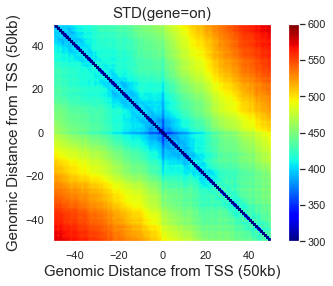

In [21]:
#Here I am going to generate the average STD between surrounding loci for gene on
Med_Dis={};
count=0
for barcode in range(600):
    file='Transcription_Trajectories/Test'+str(barcode)+'.npy'
    trans=np.load(file)

    if np.sum(trans)>1:
        try: 
            #It is the STD, ignore the names within the folder
            file = "Single_Gene_on_std/Median_"+str(barcode)
            ff=pd.read_csv(file)
            Meds=ff.values[barcode-50:barcode+50,barcode-50:barcode+50]#ff2.values[barcode-50:barcode+50,barcode-50:barcode+50]
            if np.sum(Meds)>0:
                Med_Dis[count]= Meds
                count=count+1
        except:
            pass
        
Temp=Med_Dis[0]*0
for i in range(len(Med_Dis)):
    Temp=Temp+Med_Dis[i]
    
Average2=Temp/(len(Med_Dis)+1)
print(len(Med_Dis))
fig=plt.figure()
vv1=plt.imshow((Average2), cmap=cm, extent=(-50,50,-50,50))
plt.grid(b=None)
vv1.set_clim(300, 600)
#vv1.set_clim(-50, 50)
plt.colorbar(vv1)
plt.title('STD(gene=on)',fontsize=15)
plt.xlabel('Genomic Distance from TSS (50kb)',fontsize=15)
plt.ylabel('Genomic Distance from TSS (50kb)',fontsize=15)
fig.savefig("Figures/"+"STD_gene_on.png", dpi=300, bbox_inches='tight')


62


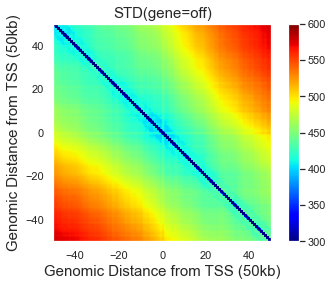

In [20]:
#Here I am going to generate the average STD between surrounding loci for gene on
Med_Dis={};
count=0
for barcode in range(600):
    file='Transcription_Trajectories/Test'+str(barcode)+'.npy'
    trans=np.load(file)

    if np.sum(trans)>1:
        try: 
            #It is the STD, ignore the names within the folder
            file = "Single_Gene_off_std/Median_"+str(barcode)
            ff=pd.read_csv(file)
            Meds=ff.values[barcode-50:barcode+50,barcode-50:barcode+50]#ff2.values[barcode-50:barcode+50,barcode-50:barcode+50]
            if np.sum(Meds)>0:
                Med_Dis[count]= Meds
                count=count+1
        except:
            pass
        
Temp=Med_Dis[0]*0
for i in range(len(Med_Dis)):
    Temp=Temp+Med_Dis[i]
    
Average2=Temp/(len(Med_Dis)+1)
print(len(Med_Dis))
fig=plt.figure()
vv1=plt.imshow((Average2), cmap=cm, extent=(-50,50,-50,50))
plt.grid(b=None)
vv1.set_clim(300, 600)
#vv1.set_clim(-50, 50)
plt.colorbar(vv1)
plt.title('STD(gene=off)',fontsize=15)
plt.xlabel('Genomic Distance from TSS (50kb)',fontsize=15)
plt.ylabel('Genomic Distance from TSS (50kb)',fontsize=15)
fig.savefig("Figures/"+"STD_gene_off.png", dpi=300, bbox_inches='tight')


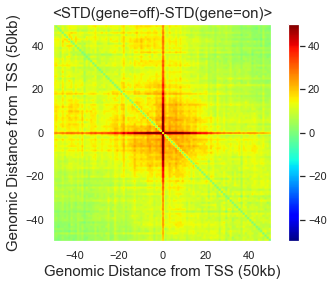

In [14]:

#Here I am going to generate the average STD difference between the two
Med_Dis={};
count=0
for barcode in range(600):
    file='../Transcription_Trajectories/Test'+str(barcode)+'.npy'
    trans=np.load(file)

    if np.sum(trans)>500:
        try: 
            file = "Single_Gene_off_std/Median_"+str(barcode)
            ff=pd.read_csv(file)
            
            file = "Single_Gene_on_std/Median_"+str(barcode)
            ff2=pd.read_csv(file)
            
            Meds=ff.values[barcode-50:barcode+50,barcode-50:barcode+50]-ff2.values[barcode-50:barcode+50,barcode-50:barcode+50]
            if np.sum(Meds)>0:
                Med_Dis[count]= Meds
                count=count+1
        except:
            pass
        
Temp=Med_Dis[0]*0
for i in range(len(Med_Dis)):
    Temp=Temp+Med_Dis[i]
    


Average2=Temp/(len(Med_Dis)+1)
fig=plt.figure()
vv1=plt.imshow((Average2), cmap=cm, extent=(-50,50,-50,50))
plt.grid(b=None)
#vv1.set_clim(200, 600)
vv1.set_clim(-50, 50)
plt.colorbar(vv1)
#plt.title('<med(gene=off)-med(gene=on)',fontsize=15)
plt.xlabel('Genomic Distance from TSS (50kb)',fontsize=15)
plt.ylabel('Genomic Distance from TSS (50kb)',fontsize=15)


plt.title('<STD(gene=off)-STD(gene=on)>',fontsize=15)
fig.savefig("Figures/"+"Dif_STD.png", dpi=300, bbox_inches='tight')

<h2> Medians surrounding genes </h2>

<h3> First we are going to quantify the median distances around each gene and save them to the designated folder </h3> 

In [ ]:
import time
from scipy.stats import entropy
from pathlib import Path
Npoints=100

try:
    os.makedirs('Single_Gene_off_Median') 
except:
    print('Allready there')


(_, _, filenames) = next(os.walk('Linked_Trajectories'))
Cor=np.load('Linked_Trajectories/'+filenames[0])
num_of_loci=len(Cor)


Start=time.perf_counter()

#First step is going to be creating the dataframe with the proper size of empty lists

df2 = pd.DataFrame();
Array_Index=[]
for barcode1 in range(num_of_loci):
    Array_Index.append("barcode"+str(barcode1))
    Entropy_Array=np.zeros(num_of_loci)
    df2["barcode"+str(barcode1)]=Entropy_Array
df2["Inds"]=np.array(Array_Index)
df2.set_index('Inds',inplace=True)

for barcode in range(num_of_loci):

    file='../Transcription_Trajectories/Test'+str(barcode)+'.npy'
    trans=0
    try:
        trans=np.load(file)
    except:
        hey=1
        
    if np.nansum(trans)>0:
        
        inds2=trans==0;
             
        df2 = pd.DataFrame();
        Array_Index=[]
        for barcode1 in range(num_of_loci):
            Array_Index.append("barcode"+str(barcode1))
            Entropy_Array=np.zeros(num_of_loci)
            df2["barcode"+str(barcode1)]=Entropy_Array
        df2["Inds"]=np.array(Array_Index)
        df2.set_index('Inds',inplace=True)
      
        for barcode1 in range(num_of_loci):

            print(barcode/num_of_loci, barcode1/num_of_loci)
            clear_output(wait=True)

            file = "../Distances/Distances_"+str(barcode1)
            df=pd.read_csv(file)

            for barcode2 in range(num_of_loci):
                    if df2["barcode"+str(barcode1)]["barcode"+str(barcode2)]==0:
                        if barcode2!=barcode1:

                            if len(df["barcode"+str(barcode2)][inds2])>Npoints:

                                values=df["barcode"+str(barcode2)][inds2].values
                                Entropy=np.nanmedian(values)

                            else:
                                Entropy=nan

                            #kde_pdf, bb=np.histogram(df["barcode"+str(barcode2)], bins=x, range=None, normed=None, weights=None, density=True)
                            df2["barcode"+str(barcode1)]["barcode"+str(barcode2)]=Entropy
                            df2["barcode"+str(barcode2)]["barcode"+str(barcode1)]=Entropy
                                
        file = "Single_Gene_off_Median/Median_"+str(barcode)
        df2.to_csv(file,index=False)
        print(time.perf_counter()-Start)

In [ ]:
import time
from scipy.stats import entropy
from pathlib import Path
Npoints=100

try:
    os.makedirs('Single_Gene_on_Median') 
except:
    print('Allready there')


(_, _, filenames) = next(os.walk('Linked_Trajectories'))
Cor=np.load('Linked_Trajectories/'+filenames[0])
num_of_loci=len(Cor)


Start=time.perf_counter()

#First step is going to be creating the dataframe with the proper size of empty lists

df2 = pd.DataFrame();
Array_Index=[]
for barcode1 in range(num_of_loci):
    Array_Index.append("barcode"+str(barcode1))
    Entropy_Array=np.zeros(num_of_loci)
    df2["barcode"+str(barcode1)]=Entropy_Array
df2["Inds"]=np.array(Array_Index)
df2.set_index('Inds',inplace=True)

for barcode in range(num_of_loci):

    file='Transcription_Trajectories/Test'+str(barcode)+'.npy'
    trans=0
    try:
        trans=np.load(file)
    except:
        hey=1
        
    if np.nansum(trans)>0:
        
        inds2=trans>0;
        
        
        df2 = pd.DataFrame();
        Array_Index=[]
        for barcode1 in range(num_of_loci):
            Array_Index.append("barcode"+str(barcode1))
            Entropy_Array=np.zeros(num_of_loci)
            df2["barcode"+str(barcode1)]=Entropy_Array
        df2["Inds"]=np.array(Array_Index)
        df2.set_index('Inds',inplace=True)

        
        for barcode1 in range(num_of_loci):

            print(barcode/num_of_loci, barcode1/num_of_loci)
            clear_output(wait=True)

            file = "Distances/Distances_"+str(barcode1)
            df=pd.read_csv(file)

            for barcode2 in range(num_of_loci):
                    if df2["barcode"+str(barcode1)]["barcode"+str(barcode2)]==0:
                        if barcode2!=barcode1:

                            if len(df["barcode"+str(barcode2)][inds2])>Npoints:

                                values=df["barcode"+str(barcode2)][inds2].values
                                Entropy=np.nanmedian(values)

                            else:
                                Entropy=nan

                            #kde_pdf, bb=np.histogram(df["barcode"+str(barcode2)], bins=x, range=None, normed=None, weights=None, density=True)
                            df2["barcode"+str(barcode1)]["barcode"+str(barcode2)]=Entropy
                            df2["barcode"+str(barcode2)]["barcode"+str(barcode1)]=Entropy
                            
        




        file = "Single_Gene_on_Median/Median_"+str(barcode)
        df2.to_csv(file,index=False)
        print(time.perf_counter()-Start)

<h3> Figures from the previous analysis </h3>

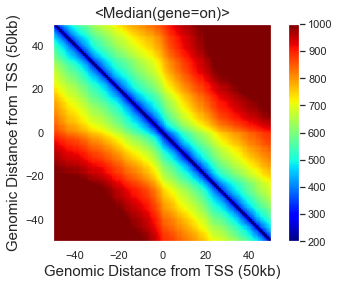

In [11]:
#Here I am going to generate the average median distance between surrounding loci for gene on

Med_Dis={};
count=0

#Here it only goes to 600 because you need 50 on each side of each gene. 
for barcode in range(600):
    file='Transcription_Trajectories/Test'+str(barcode)+'.npy'
    trans=np.load(file)

    if np.sum(trans)>1:
        try: 
            file = "Single_Gene_on_Median/Median_"+str(barcode)
            ff=pd.read_csv(file)
            Meds=ff.values[barcode-50:barcode+50,barcode-50:barcode+50]#ff2.values[barcode-50:barcode+50,barcode-50:barcode+50]
            if np.sum(Meds)>0:
                Med_Dis[count]= Meds
                count=count+1
        except:
            pass

Temp=Med_Dis[0]*0
for i in range(len(Med_Dis)):
    Temp=Temp+Med_Dis[i]
    
Average2=Temp/(len(Med_Dis))
fig=plt.figure()
vv1=plt.imshow((Average2), cmap=cm, extent=(-50,50,-50,50))
plt.grid(b=None)
vv1.set_clim(200, 1000)
#vv1.set_clim(-50, 50)
plt.colorbar(vv1)
plt.title('<Median(gene=on)>',fontsize=15)
plt.xlabel('Genomic Distance from TSS (50kb)',fontsize=15)
plt.ylabel('Genomic Distance from TSS (50kb)',fontsize=15)
fig.savefig("Figures/"+"Med_gene_on.png", dpi=300, bbox_inches='tight')

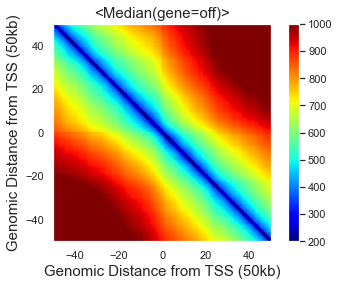

In [12]:
#Here I am going to generate the average median distance between surrounding loci for gene on
Med_Dis={};
count=0
for barcode in range(600):
    file='Transcription_Trajectories/Test'+str(barcode)+'.npy'
    trans=np.load(file)

    if np.sum(trans)>1:
        try: 
            file = "Single_Gene_off_Median/Median_"+str(barcode)
            ff=pd.read_csv(file)
            Meds=ff.values[barcode-50:barcode+50,barcode-50:barcode+50]#ff2.values[barcode-50:barcode+50,barcode-50:barcode+50]
            if np.sum(Meds)>0:
                Med_Dis[count]= Meds
                count=count+1
        except:
            pass
        
Temp=Med_Dis[0]*0
for i in range(len(Med_Dis)):
    Temp=Temp+Med_Dis[i]
    
Average2=Temp/(len(Med_Dis))
fig=plt.figure()
vv1=plt.imshow((Average2), cmap=cm, extent=(-50,50,-50,50))
plt.grid(b=None)
vv1.set_clim(200, 1000)
#vv1.set_clim(-50, 50)
plt.colorbar(vv1)
plt.title('<Median(gene=off)>',fontsize=15)
plt.xlabel('Genomic Distance from TSS (50kb)',fontsize=15)
plt.ylabel('Genomic Distance from TSS (50kb)',fontsize=15)

fig.savefig("Figures/"+"Med_gene_off.png", dpi=300, bbox_inches='tight')



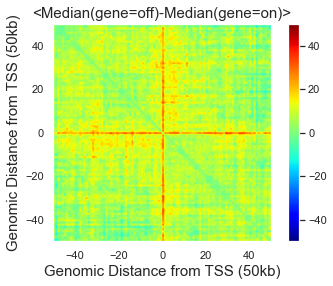

In [13]:

#Here I am going to generate the average median distance between surrounding loci for gene on
Med_Dis={};
count=0
for barcode in range(650):
    file='Transcription_Trajectories/Test'+str(barcode)+'.npy'
    trans=np.load(file)

    if np.sum(trans)>1:
        try: 
            file = "Single_Gene_off_Median/Median_"+str(barcode)
            ff=pd.read_csv(file)
            
            file = "Single_Gene_on_Median/Median_"+str(barcode)
            ff2=pd.read_csv(file)
            
           # Meds=ff.values[barcode-9:barcode+9,barcode-9:barcode+9]-ff2.values[barcode-9:barcode+9,barcode-9:barcode+9]
            
            ss=50
            
            Meds=ff.values[barcode-ss:barcode+ss,barcode-ss:barcode+ss]-ff2.values[barcode-ss:barcode+ss,barcode-ss:barcode+ss]
            
            if np.sum(Meds)>0 and len(Meds)==ss*2:
                Med_Dis[count]= Meds
                count=count+1
        except:
            pass
        
Temp=Med_Dis[0]*0
for i in range(len(Med_Dis)):
    Temp=Temp+Med_Dis[i]
    
Average2=Temp/(len(Med_Dis)+1)
fig=plt.figure()
vv1=plt.imshow((Average2), cmap=cm, extent=(-ss,ss,-ss,ss))
plt.grid(b=None)
#vv1.set_clim(200, 600)
vv1.set_clim(-50, 50)
plt.colorbar(vv1)
plt.title('<Median(gene=off)-Median(gene=on)>',fontsize=15)
plt.xlabel('Genomic Distance from TSS (50kb)',fontsize=15)
plt.ylabel('Genomic Distance from TSS (50kb)',fontsize=15)
fig.savefig("Figures/"+"Dif_Median.png", dpi=300, bbox_inches='tight')



<h2> Quantify the distances to the centroids with and without transcription </h2> 

In [22]:
#This is the analysis part for both fig J and K

import time
from scipy.stats import entropy
from pathlib import Path
Npoints=100


(_, _, filenames) = next(os.walk('Linked_Trajectories'))
Cor=np.load('Linked_Trajectories/'+filenames[0])
num_of_loci=len(Cor)



D_to_Center_off={}
D_to_Center_on={}
diff={}

for scale in range(5, 250,5):

    D_to_Center_off[scale]=np.array([]);
    D_to_Center_on[scale]=np.array([]);
    diff[scale]=np.array([]);

for scale in range(5, 250,5):
    print(scale)
    for barcode in range(num_of_loci):
        if barcode-scale>0 and barcode+scale<651:

            file='Transcription_Trajectories/Test'+str(barcode)+'.npy'
            trans=0
            try:
                trans=np.load(file)
            except:
                hey=1

            if np.nansum(trans)>0:







                temp_on=np.array([])
                temp_off=np.array([])

                for kcat2 in range(len(filenames)):


                        if trans[kcat2]==0:
                            file = "Linked_Trajectories/"+"Test"+str(kcat2+1)+'.npy'
                            Cor=np.load(file)

                            try: 
                                if barcode-scale>0 and barcode+scale<651:
                                    dis=pdist(np.vstack((Cor[barcode,:],[np.nanmean(Cor[barcode-scale:barcode+scale,0]),np.nanmean(Cor[barcode-scale:barcode+scale,1]), np.nanmean(Cor[barcode-scale:barcode+scale,2])])))
                                    newdis=dis[0]
                                    temp_off=np.append(temp_off,newdis)

                            except:
                                pass
                        else: 
                            file = "Linked_Trajectories/"+"Test"+str(kcat2+1)+'.npy'
                            Cor=np.load(file)


                            try:
                                if barcode-scale>0 and barcode+scale<651:
                                    dis=pdist(np.vstack((Cor[barcode,:],[np.nanmean(Cor[barcode-scale:barcode+scale,0]),np.nanmean(Cor[barcode-scale:barcode+scale,1]), np.nanmean(Cor[barcode-scale:barcode+scale,2])])))
                                    newdis=dis[0]
                                    temp_on=np.append(temp_on,newdis)

                            except:
                                pass

                D_to_Center_off[scale]=np.append(D_to_Center_off[scale], np.nanmean(temp_off))
                D_to_Center_on[scale]=np.append(D_to_Center_on[scale], np.nanmean(temp_on))
                diff[scale]=np.append(diff[scale],np.nanmean(temp_off)-np.nanmean(temp_on))





5


<ipython-input-22-821fd35666cd>:57: RuntimeWarning: Mean of empty slice
  dis=pdist(np.vstack((Cor[barcode,:],[np.nanmean(Cor[barcode-scale:barcode+scale,0]),np.nanmean(Cor[barcode-scale:barcode+scale,1]), np.nanmean(Cor[barcode-scale:barcode+scale,2])])))


10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245


In [23]:
#Here we are going to convert it to a dataframe so that I can use sns to make my figure. 
data = {'Chromatin Around TSS Sites Included in Local Centroid Calulation (Mb)': [], 'Gene': [], 'Mean Distance to Local Centroid (nm)': []}
df= pd.DataFrame.from_dict(data)

for i in D_to_Center_off:
    for ii in D_to_Center_off[i]:
        df.loc[len(df.index)] = [i*50/1000, 'Gene=off', ii]
        
for i in D_to_Center_on:
    for ii in D_to_Center_on[i]:
        df.loc[len(df.index)] = [i*50/1000, 'Gene=on', ii]

<h3> Make the figure </h3>

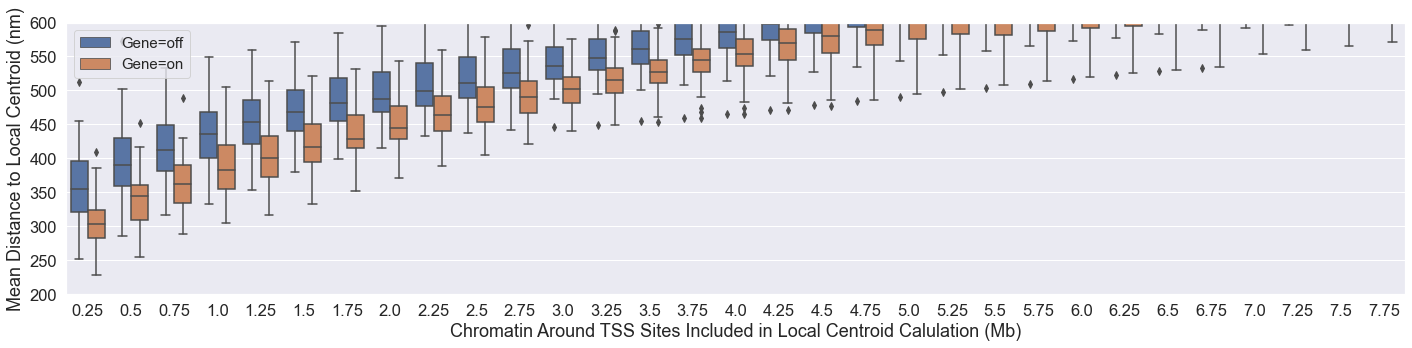

In [26]:
sns.set(font_scale=1.5)
fig=plt.figure()
#ax = sns.violinplot(x='Chromatin Around TSS Sites Included in Local Centroid Calulation (Mb)', y='Mean Distance to Local Centroid (nm)', hue="Gene",
              #      data=df, palette="muted", inner = 'box')

ax = sns.boxplot(x='Chromatin Around TSS Sites Included in Local Centroid Calulation (Mb)', y='Mean Distance to Local Centroid (nm)', hue="Gene",
                    data=df)
#ax = sns.stripplot(x='Chromatin Around TSS Sites Included in Local Centroid Calulation (Mb)', y='Mean Distance to Local Centroid (nm)', hue="Gene",
                  #  data=df, dodge=True, color=".3")
plt.legend(loc='upper left',fontsize=15)
fig.set_size_inches(24,5)
plt.xlim(-.5,30.5)
plt.ylim(200,600)


fig.savefig("Figures/"+"Box_plots.png", dpi=300, bbox_inches='tight')

In [ ]:
#Here we are going to convert it to a dataframe so that I can use sns to make my figure. 
data = {'Chromatin Around TSS Sites Included in Local Centroid Calulation (Mb)': [], 'Gene': [], 'Gene off-Gene on': []}
df= pd.DataFrame.from_dict(data)

for i in diff:
    for ii in diff[i]:
        df.loc[len(df.index)] = [i*50/1000, 'off', ii]